# Import Libraries

In [132]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/groceries/EDA


# Connection to the DB

In [133]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('../groceries_database.db')  

query = "SELECT * FROM butter_table"
df = pd.read_sql_query(query, conn)

conn.close()

print(df.head())

  product_type web-scraper-order  \
0       butter      1698754764-1   
1       butter      1698754764-2   
2       butter      1698754764-3   
3       butter      1698754764-4   
4       butter      1698754764-5   

                               web-scraper-start-url  \
0  https://www.aldi-now.ch/de/milchprodukte-&-eie...   
1  https://www.aldi-now.ch/de/milchprodukte-&-eie...   
2  https://www.aldi-now.ch/de/milchprodukte-&-eie...   
3  https://www.aldi-now.ch/de/milchprodukte-&-eie...   
4  https://www.aldi-now.ch/de/milchprodukte-&-eie...   

                        productname_raw  price_raw  weight_raw Supermarkt  \
0                            Die Butter       3.95         250       Aldi   
1         RETOUR AUX SOURCES BIO Butter       4.19         200       Aldi   
2  BIO NATURA Butter 100 g, laktosefrei       2.95         100       Aldi   
3                    MILFINA Kochbutter       3.49         250       Aldi   
4                 MILFINA Kräuterbutter       2.85         10

# Non graphical analysis    

In [134]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('../groceries_database.db')  

query = '''
    SELECT product_type, Supermarkt, price_per_100g
    FROM butter_table
'''

df_all = pd.read_sql_query(query, conn)

if not df_all.empty:
    
    average_prices = df_all.groupby(['Supermarkt', 'product_type'])['price_per_100g'].mean()
    print("Average prices per product and supermarket:")
    print(average_prices)

    cheapest_avg_price = df_all.groupby('product_type')['price_per_100g'].min()
    print("\nCheapest average price per product:")
    print(cheapest_avg_price)

    for product in df_all['product_type'].unique():
        cheapest_supermarket = df_all[df_all['product_type'] == product].sort_values(by='price_per_100g').iloc[0]['Supermarkt']
        print(f"\Cheapest Supermarkt für {product}: {cheapest_supermarket}")

    std_dev_prices = df_all.groupby(['Supermarkt', 'product_type'])['price_per_100g'].std()
    print("\nStandard deviation of prices per product and supermarket:")
    print(std_dev_prices)

    overall_avg_price = df_all['price_per_100g'].mean()
    print("\nOverall average price across all products and supermarkets:")
    print(overall_avg_price)
else:
    print("Die Abfrage hat keine Ergebnisse zurückgegeben.")


Average prices per product and supermarket:
Supermarkt  product_type
Aldi        butter          1.711875
Coop        butter          3.007600
Migros      butter          2.682931
Name: price_per_100g, dtype: float64

Cheapest average price per product:
product_type
butter    0.48
Name: price_per_100g, dtype: float64
\Cheapest Supermarkt für butter: Aldi

Standard deviation of prices per product and supermarket:
Supermarkt  product_type
Aldi        butter          0.736543
Coop        butter          2.059957
Migros      butter          1.599372
Name: price_per_100g, dtype: float64

Overall average price across all products and supermarkets:
2.6885483870967746


## Frequencies

In [135]:
print(df_all[df_all['product_type'] == 'butter']['Supermarkt'].value_counts())

Supermarkt
Migros    58
Coop      50
Aldi      16
Name: count, dtype: int64


## Grafische Darstellung

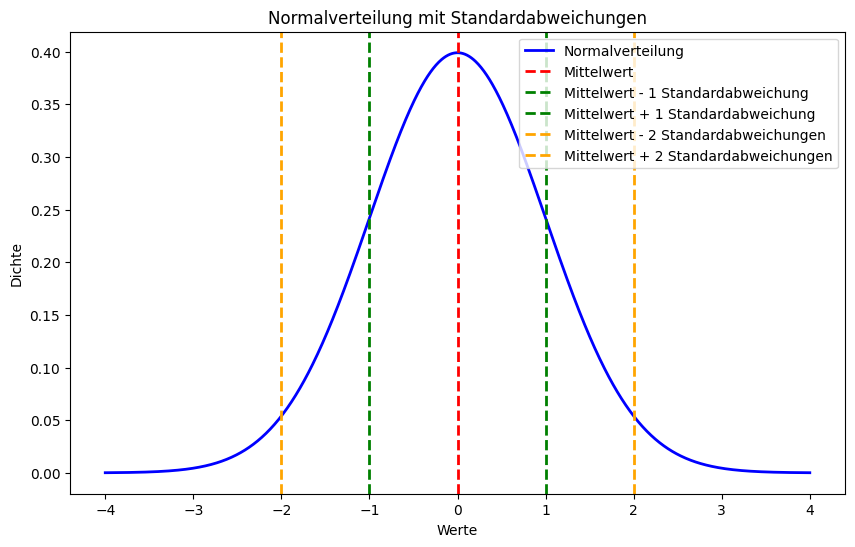

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Annahme: Verwenden Sie Mittelwert 0, Standardabweichung 1 (Standardnormalverteilung)
mean = 0
std_dev = 1

# Erzeugung von Werten für die Normalverteilung
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)
pdf = norm.pdf(x, mean, std_dev)

# Plot der Normalverteilung
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normalverteilung', color='blue', linewidth=2)

# Markierung von Standardabweichungen
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mittelwert')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=2, label='Mittelwert - 1 Standardabweichung')
plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=2, label='Mittelwert + 1 Standardabweichung')
plt.axvline(mean - 2 * std_dev, color='orange', linestyle='dashed', linewidth=2, label='Mittelwert - 2 Standardabweichungen')
plt.axvline(mean + 2 * std_dev, color='orange', linestyle='dashed', linewidth=2, label='Mittelwert + 2 Standardabweichungen')

# Beschriftungen und Legende
plt.title('Normalverteilung mit Standardabweichungen')
plt.xlabel('Werte')
plt.ylabel('Dichte')
plt.legend()

plt.show()


# Graphical analysis (new)

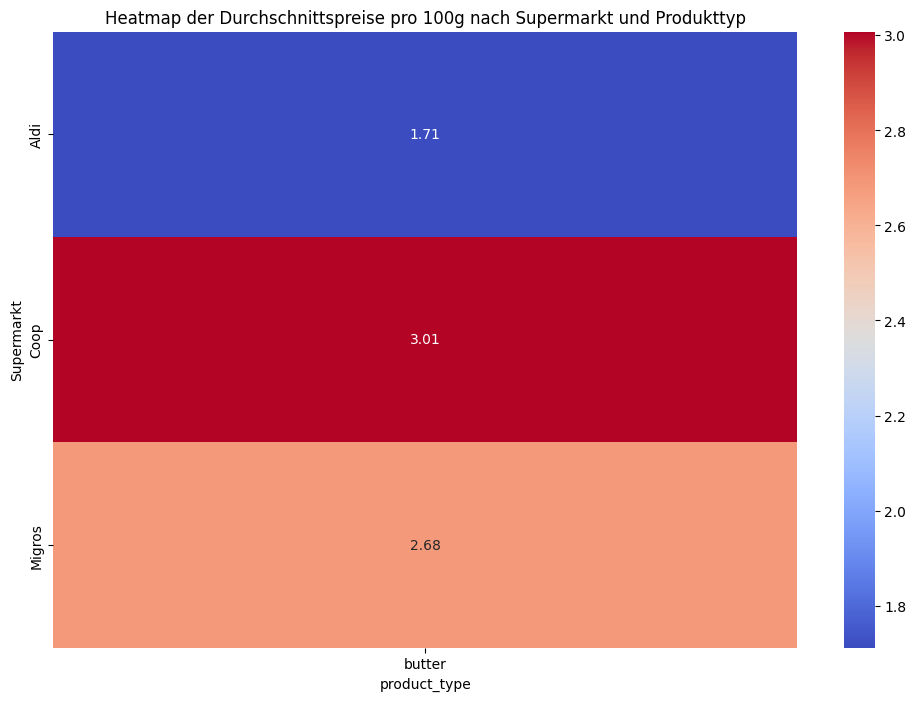

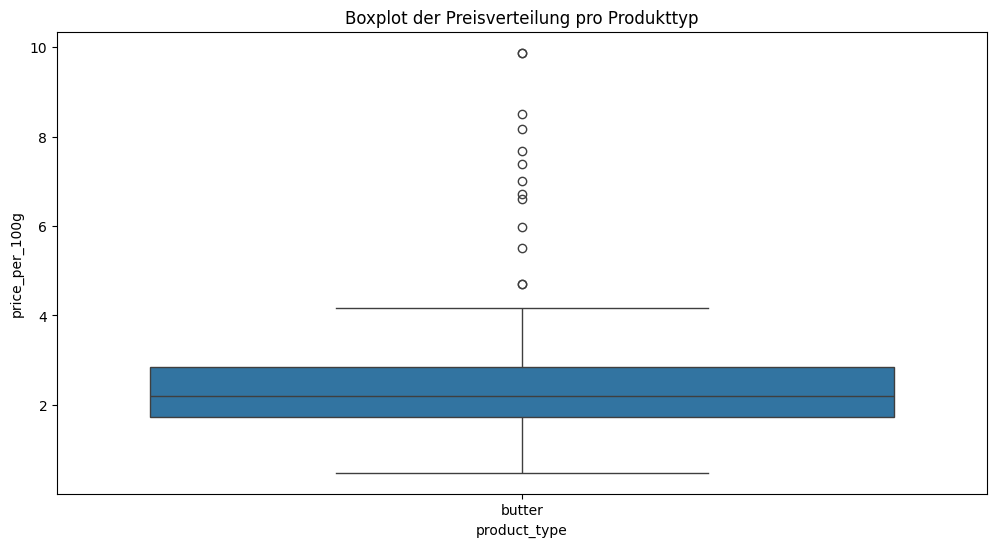

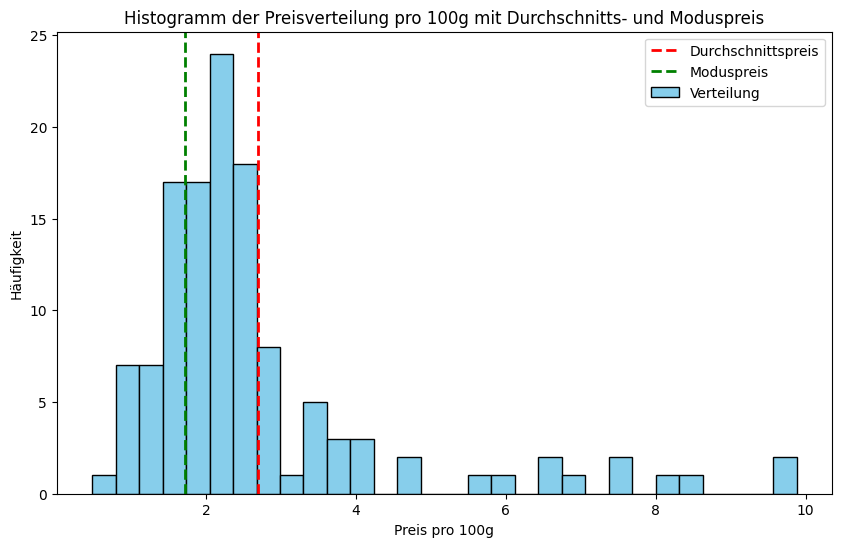

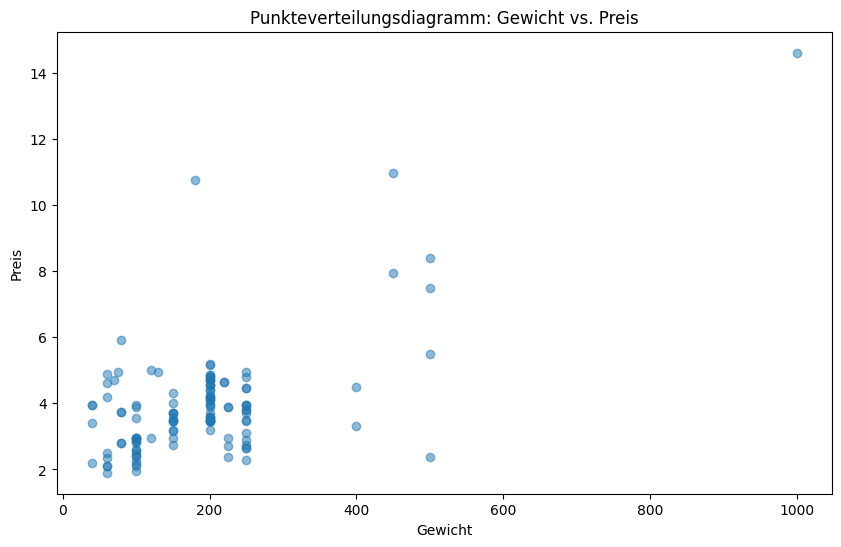

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Erstellen einer Pivot-Tabelle für die Heatmap
heatmap_data = df.pivot_table('price_per_100g', index='Supermarkt', columns='product_type', aggfunc='mean')

# Erstellen der Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap der Durchschnittspreise pro 100g nach Supermarkt und Produkttyp')
plt.show()

# Boxplot der Preisverteilung pro Produkttyp
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_type', y='price_per_100g', data=df)
plt.title('Boxplot der Preisverteilung pro Produkttyp')
plt.show()

# Histogramm der Preisverteilung
plt.figure(figsize=(10, 6))
plt.hist(df['price_per_100g'], bins=30, color='skyblue', edgecolor='black')

# Berechnung des Durchschnittspreises und Hinzufügen einer Linie
mean_price = np.mean(df['price_per_100g'])
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2)

# Berechnung des häufigsten Preises (Modus) und Hinzufügen einer Linie
mode_price = df['price_per_100g'].mode()[0]
plt.axvline(mode_price, color='green', linestyle='dashed', linewidth=2)

# Hinzufügen von Beschriftungen
plt.title('Histogramm der Preisverteilung pro 100g mit Durchschnitts- und Moduspreis')
plt.xlabel('Preis pro 100g')
plt.ylabel('Häufigkeit')
plt.legend(['Durchschnittspreis', 'Moduspreis', 'Verteilung'])

plt.show()


# Punkteverteilungsdiagramm von Preis vs. Gewicht
plt.figure(figsize=(10, 6))
plt.scatter(df['weight_raw'], df['price_raw'], alpha=0.5)
plt.title('Punkteverteilungsdiagramm: Gewicht vs. Preis')
plt.xlabel('Gewicht')
plt.ylabel('Preis')
plt.show()


# Graphical analysis

Index(['product_type', 'Supermarkt', 'price_per_100g'], dtype='object')


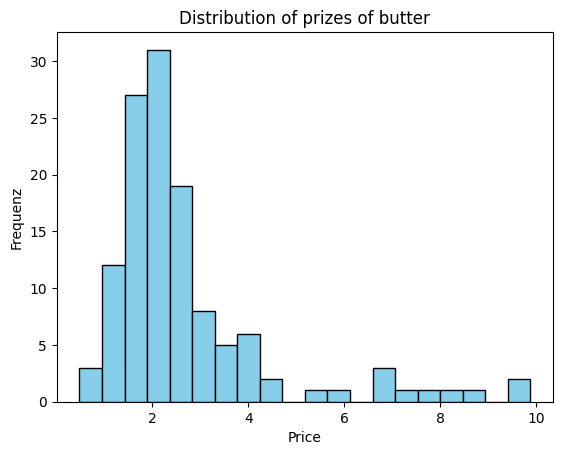

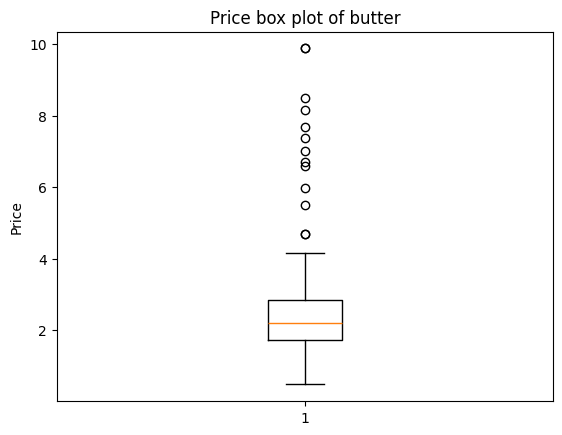

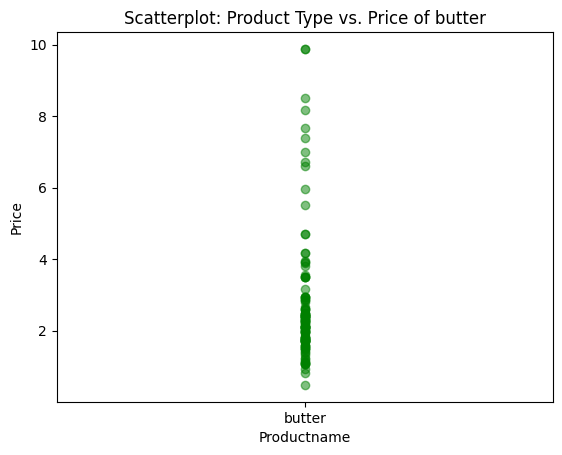

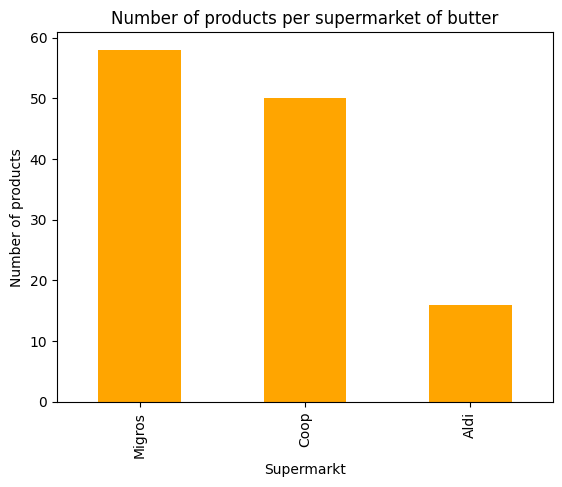

In [138]:
print(df_all.columns)

plt.hist(df_all['price_per_100g'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequenz')
plt.title('Distribution of prizes of butter')
plt.show()

plt.boxplot(df_all['price_per_100g'])
plt.ylabel('Price')
plt.title('Price box plot of butter')
plt.show()

plt.scatter(df_all['product_type'], df_all['price_per_100g'], alpha=0.5, color='green')
plt.xlabel('Productname')
plt.ylabel('Price')
plt.title('Scatterplot: Product Type vs. Price of butter')
plt.show()


df_all['Supermarkt'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Supermarkt')
plt.ylabel('Number of products')
plt.title('Number of products per supermarket of butter')
plt.show()


## Szenario 1: Regression

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Annahme: 'weight_raw' als unabhängige Variable und 'price_per_100g' als abhängige Variable
X = df[['weight_raw']]  # Merkmal
y = df['price_per_100g']  # Zielvariable

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression-Modell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen für Testdaten
y_pred = model.predict(X_test)

# Bewertung des Modells
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 5.82084032366105


## Szenario 2: Klassifikation

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Annahme: 'weight_raw' und 'Supermarkt' als unabhängige Variablen und 'price_per_100g' als abhängige Variable (Kategorie)
X = df[['weight_raw', 'Supermarkt']]  # Merkmale

# One-Hot-Encoding für die kategoriale Variable 'Supermarkt'
X = pd.get_dummies(X, columns=['Supermarkt'], drop_first=True)

# Zielvariable definieren
y = pd.cut(df['price_per_100g'], bins=[0, 1, 2, 3, float('inf')], labels=['sehr_günstig', 'günstig', 'mittel', 'teuer'])

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier erstellen und trainieren
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Vorhersagen für Testdaten
y_pred = model.predict(X_test)

# Bewertung des Modells
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8


## Modellbewertung für Regression (z. B. R-Squared, RMSE):

In [141]:
from sklearn.metrics import accuracy_score

# Vorhersagen für Trainingsdaten
y_train_pred = model.predict(X_train)

# Vorhersagen für Testdaten
y_test_pred = model.predict(X_test)

# Genauigkeit für Trainingsdaten
accuracy_train = accuracy_score(y_train, y_train_pred)

# Genauigkeit für Testdaten
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Genauigkeit (Train): {accuracy_train}")
print(f"Genauigkeit (Test): {accuracy_test}")


Genauigkeit (Train): 0.797979797979798
Genauigkeit (Test): 0.8


## Modellbewertung für Klassifikation (z. B. Genauigkeit, Recall, Präzision):

In [142]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Vorhersagen für Trainingsdaten
y_train_pred = model.predict(X_train)

# Vorhersagen für Testdaten
y_test_pred = model.predict(X_test)

# Genauigkeit für Trainingsdaten
accuracy_train = accuracy_score(y_train, y_train_pred)

# Genauigkeit für Testdaten
accuracy_test = accuracy_score(y_test, y_test_pred)

# Recall für Testdaten (für jede Klasse separat)
recall_test = recall_score(y_test, y_test_pred, average=None)

# Präzision für Testdaten (für jede Klasse separat)
precision_test = precision_score(y_test, y_test_pred, average=None)

# Konfusionsmatrix für Testdaten
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print(f"Genauigkeit (Train): {accuracy_train}")
print(f"Genauigkeit (Test): {accuracy_test}")
print(f"Recall (Test): {recall_test}")
print(f"Präzision (Test): {precision_test}")
print(f"Konfusionsmatrix (Test):\n{conf_matrix_test}")


Genauigkeit (Train): 0.797979797979798
Genauigkeit (Test): 0.8
Recall (Test): [1.         0.69230769 0.8       ]
Präzision (Test): [0.7 0.9 0.8]
Konfusionsmatrix (Test):
[[7 0 0]
 [3 9 1]
 [0 1 4]]


## 7. Correct interpretation of model results and measures of fit.

In [143]:
from sklearn.metrics import accuracy_score

# Vorhersagen für Testdaten
y_test_pred = model.predict(X_test)

# Genauigkeit für Testdaten
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Genauigkeit (Test): {accuracy_test}")


Genauigkeit (Test): 0.8


# ANOVA (Analysis of Variance:)

In [144]:
from scipy.stats import f_oneway

anova_result = f_oneway(*[group['price_per_100g']for name, group in df.groupby('Supermarkt')])

p_value_anova = anova_result.pvalue

print(f"P-Value (ANOVA): {p_value_anova}")

if p_value_anova < 0.05:
    print("There is a significant difference in prices between supermarkets.")
else:
    print("There is no significant difference in prices between supermarkets.")

P-Value (ANOVA): 0.03649321671840743
There is a significant difference in prices between supermarkets.


# Comparing

## average price

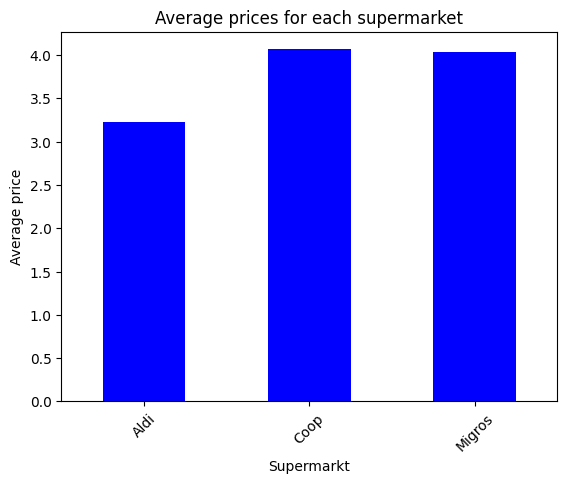

In [145]:
# Query the SQL-table for butter_table (all records)
query = "SELECT * FROM butter_table"
df_all = pd.read_sql_query(query, conn)

df_all['price_raw'] = pd.to_numeric(df_all['price_raw'], errors='coerce')
df_all['Supermarkt'] = df_all['Supermarkt'].astype(str)

average_prices = df_all.groupby('Supermarkt')['price_raw'].mean()

average_prices.plot(kind='bar', color='blue')
plt.xlabel('Supermarkt')
plt.ylabel('Average price')
plt.title('Average prices for each supermarket')
plt.xticks(rotation=45)
plt.show()

## max-price

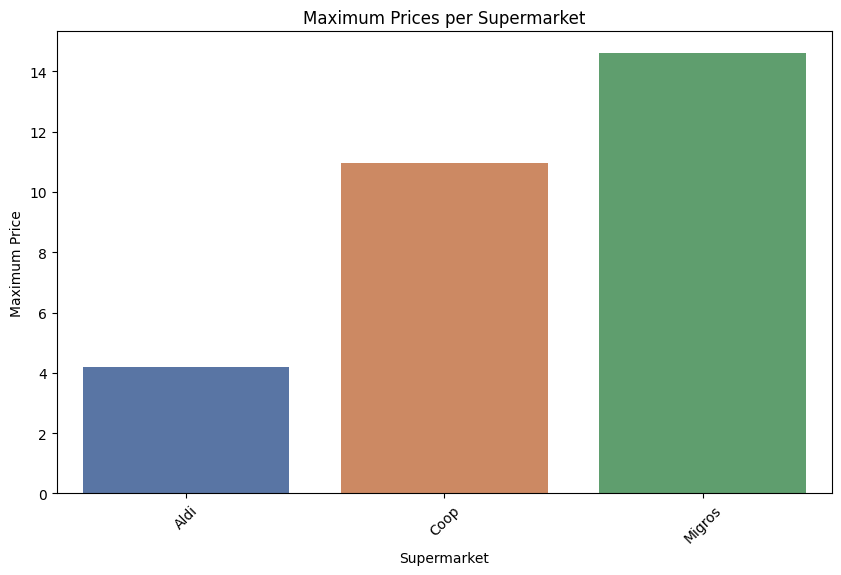

In [146]:
# Calculate the maximum price for each supermarket
max_prices = df_all.groupby('Supermarkt')['price_raw'].max().reset_index()

# Bar chart for maximum prices
plt.figure(figsize=(10,6))
sns.barplot(x='Supermarkt', y='price_raw', data=max_prices, palette='deep')
plt.xlabel('Supermarket')
plt.ylabel('Maximum Price')
plt.title('Maximum Prices per Supermarket')
plt.xticks(rotation=45)
plt.show()


## min price

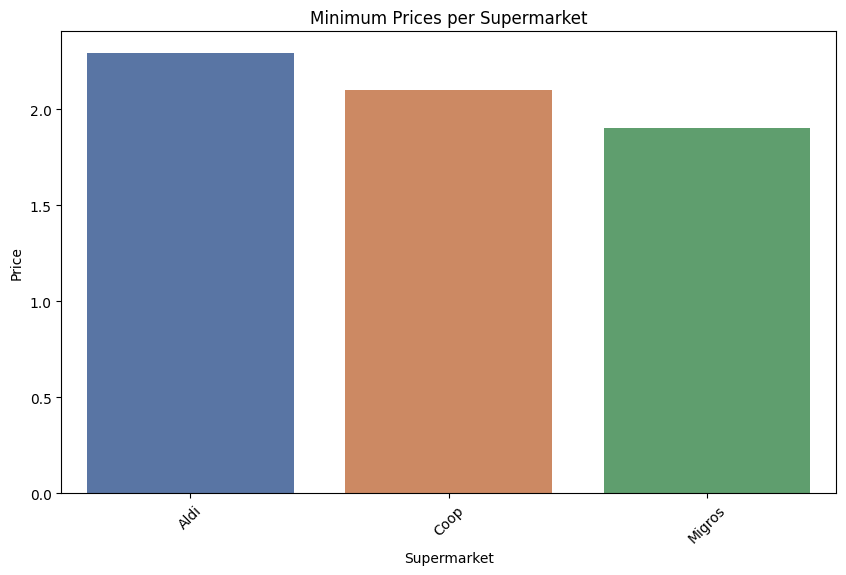

In [147]:
# Calculate the minimum price for each supermarket
min_prices = df_all.groupby('Supermarkt')['price_raw'].min().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Supermarkt', y='price_raw', data=min_prices, palette='deep')
plt.xlabel('Supermarket')
plt.ylabel('Price')
plt.title('Minimum Prices per Supermarket')
plt.xticks(rotation=45)
plt.show()
